# Capstone Project

## Introduction/Business Problem

Real estate sales in USA is a hundred billion dollar industry. Dispite its size, the valuation of a home is based on professional experience of a real estate agent. In this capstone project a neural network based regression algorithm to valuate a real estate is build.

## Data

The data used in this project is provided by UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/ml/index.php). The model is build and tested using the open dataset concerning housing values in suburbs of Boston.

The data consists in total 506 examples collected in 1993. The dataset has in total 13 attributes (12 continuos and 1 binary). In addition the data has professional valuation of median value of owner-occupied homes of given area.

The given attributes used for real estate valuation are:

* CRIM, per capita crime rate by town
* ZN, proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS, proportion of non-retail business acres per town
* CHAS, Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX, nitric oxides concentration (parts per 10 million)
* RM, average number of rooms per dwelling
* AGE, proportion of owner-occupied units built prior to 1940
* DIS, weighted distances to five Boston employment centres
* RAD, index of accessibility to radial highways
* TAX, full-value property-tax rate per 10,000 dollars
* PTRATIO, pupil-teacher ratio by town
* B, 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT, precentage lower status of the population

The target variable to be predicted is:

* MEDV, Median value of owner-occupied homes in 1000's dollars

### Python code for data downloading

Python pachages required in this task

In [29]:
# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs
    
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import r2_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2.0.0-alpha0


Defining data path and downloading it

In [19]:
dataset_path = keras.utils.get_file("´housing.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")
dataset_path

'C:\\Users\\jrjarim\\.keras\\datasets\\´housing.data'

Reading data as pandas dataframe

In [20]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


## Methodology

The methodology is based on rather classical regression analysis. However, in this capstone assignment neural network regression will be used. Algorithm is applied using state-of-the-art library: TensorFlow 2. The model is to be validated using test-train datasplit with 20/80 ratio.

In [21]:
dataset = dataset.dropna()

train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_labels = train_dataset.pop('MEDV')
test_labels = test_dataset.pop('MEDV')

In order to make the training phase faster, the data is normalized.

In [22]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [34]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [35]:
model = build_model()
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:524.1849,  mae:21.1059,  mse:524.1849,  val_loss:522.4579,  val_mae:20.9952,  val_mse:522.4579,  
....................................................................................................
Epoch: 100, loss:8.0537,  mae:2.0100,  mse:8.0537,  val_loss:15.4437,  val_mae:2.9353,  val_mse:15.4437,  
....................................................................................................
Epoch: 200, loss:5.4283,  mae:1.6417,  mse:5.4283,  val_loss:10.7588,  val_mae:2.3037,  val_mse:10.7588,  
....................................................................................................
Epoch: 300, loss:3.6392,  mae:1.3303,  mse:3.6392,  val_loss:13.1445,  val_mae:2.4007,  val_mse:13.1445,  
....................................................................................................
Epoch: 400, loss:2.3956,  mae:1.1012,  mse:2.3956,  val_loss:25.9233,  val_mae:3.0901,  val_mse:25.9233,  
......................................................

## Results

The model prediction was visualized using traditional True Value - Prediction plot for test data. Based on the results, the model can be applied with rather good accuracy for predicting real estate valuation in Boston metropolitan area.

R2 value for the model:  0.9348670907141435


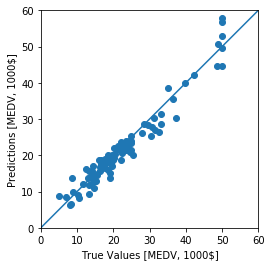

In [37]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MEDV, 1000$]')
plt.ylabel('Predictions [MEDV, 1000$]')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

R2=r2_score(test_labels, test_predictions)

print("R2 value for the model: ", R2)

The statistical goodness-of-fitting parameter R2 was also calculated. For the model, the parameter value was approximately R2 = 0.9

## Discussion

Based on the results, it is possible to predict real estate valuation using neural network -based regression models. However, the model has next to zero hints, what are the most important parameters that affect real estate valuation. In order to explain the model results, one must run it through LIME or other similar model-agnostics calculator.

## Conclusions

According to the results, one can predict the real estate valuation with sufficient accuracy using neural network -based regression algorithms.